In [1]:
#General imports
import pandas as pd
import boto3
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport
pd.set_option('display.max_columns', 200)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
S3_Key_id=''
S3_Secret_key=''

def pull_data(Key_id, Secret_key, file):
    """
    Function which CJ wrote to pull data from S3 
    """
    BUCKET_NAME = "gtown-wildfire-ds"
    OBJECT_KEY = file
    client = boto3.client(
        's3',
        aws_access_key_id= Key_id,
        aws_secret_access_key= Secret_key)
    obj = client.get_object(Bucket= BUCKET_NAME, Key= OBJECT_KEY) 
    file_df = pd.read_csv(obj['Body'])
    return (file_df)

#Pull in the firms and scan df
file = 'MLTable1.csv'
df = pull_data(S3_Key_id, S3_Secret_key, file)
df.head()

,Unnamed: 0,brightness,scan,track,confidence,bright_t31,frp,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Air Temperature Average (degF),Soil Moisture Percent -2in (pct) Start of Day Values,Relative Humidity Enclosure (pct),Wind Speed Average (mph),nearbydetections,FIRE_DETECTED,1,Aqua,Terra,MODIS,Arkansas-White-Red Region,California Region,Great Basin Region,Great Lakes Region,Hawaii Region,Lower Colorado Region,Lower Mississippi Region,Mid Atlantic Region,Missouri Region,New England Region,Ohio Region,Pacific Northwest Region,Rio Grande Region,Souris-Red-Rainy Region,South Atlantic-Gulf Region,Tennessee Region,Texas-Gulf Region,Upper Colorado Region,Upper Mississippi Region
0,1,312.5,1.2,1.1,85,269.1,21.9,11.5,0.0,2.0,36.1,78.0,7.1,0.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3,309.8,4.0,1.9,68,289.9,82.0,7.8,0.0,-8.0,4.9,66.0,1.8,5.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4,312.8,4.0,1.9,80,287.1,103.7,11.3,0.0,14.0,26.9,79.0,10.5,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,5,310.2,4.0,1.9,70,287.3,83.6,8.4,0.0,11.0,8.0,88.0,4.2,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,10,300.4,1.0,1.0,28,281.6,6.3,12.8,0.0,15.0,33.1,88.0,3.6,23.0,False,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [3]:
#unnamed seems to be a column brought in that we dont want.
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,brightness,scan,track,confidence,bright_t31,frp,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Air Temperature Average (degF),Soil Moisture Percent -2in (pct) Start of Day Values,Relative Humidity Enclosure (pct),Wind Speed Average (mph),nearbydetections,FIRE_DETECTED,1,Aqua,Terra,MODIS,Arkansas-White-Red Region,California Region,Great Basin Region,Great Lakes Region,Hawaii Region,Lower Colorado Region,Lower Mississippi Region,Mid Atlantic Region,Missouri Region,New England Region,Ohio Region,Pacific Northwest Region,Rio Grande Region,Souris-Red-Rainy Region,South Atlantic-Gulf Region,Tennessee Region,Texas-Gulf Region,Upper Colorado Region,Upper Mississippi Region
0,312.5,1.2,1.1,85,269.1,21.9,11.5,0.0,2.0,36.1,78.0,7.1,0.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,309.8,4.0,1.9,68,289.9,82.0,7.8,0.0,-8.0,4.9,66.0,1.8,5.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,312.8,4.0,1.9,80,287.1,103.7,11.3,0.0,14.0,26.9,79.0,10.5,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,310.2,4.0,1.9,70,287.3,83.6,8.4,0.0,11.0,8.0,88.0,4.2,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,300.4,1.0,1.0,28,281.6,6.3,12.8,0.0,15.0,33.1,88.0,3.6,23.0,False,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [4]:
#seperate data sets as labels and features
X = df.drop('FIRE_DETECTED', axis=1)
y = df['FIRE_DETECTED']

In [5]:
#train test splitting of data
#common syntax here is to use X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random state is a random seed

In [6]:
#create our scalar to get optimized result
sc = StandardScaler() #runs the standard scalar with default settings. you can refine this, see docs
#transform the feature data by using the fit_transform 
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test) 

In [7]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

Test the performance of four classifiers on this dataset

In [8]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from yellowbrick.classifier import roc_auc

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print("AUC for Logistic Regression Model : ", auc_score1)
print("AUC for KNeighbors Model : ", auc_score2)

AUC for Logistic Regression Model :  0.7513407239966761
AUC for KNeighbors Model :  0.8239444014022554


In [9]:
# logistic regression CV
model3 = LogisticRegressionCV()
# Random Forest
model4 = RandomForestClassifier()

# fit model
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

# predict probabilities
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)

# roc curve for models
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

print("AUC for Logistic Regression CV Model : ", auc_score3)
print("AUC for Random Forest Model : ", auc_score4)

AUC for Logistic Regression CV Model :  0.7373257301119561
AUC for Random Forest Model :  0.9423334950128296


Plot the ROC curves for the four algorithms using matplotlib

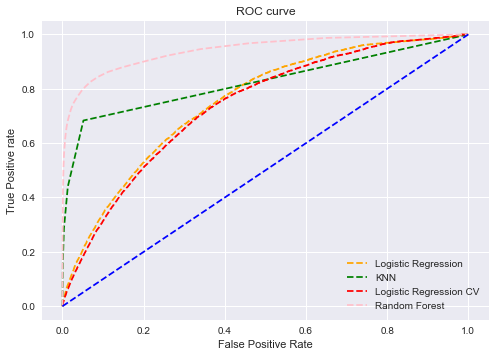

In [10]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Logistic Regression CV')
plt.plot(fpr4, tpr4, linestyle='--',color='pink', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC1',dpi=300)
plt.show();

In [11]:
# decision tree
model5 = DecisionTreeClassifier()
# linear svc
model6 = AdaBoostClassifier()

# fit model
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)

# predict probabilities
pred_prob5 = model5.predict_proba(X_test)
pred_prob6 = model6.predict_proba(X_test)

# roc curve for models
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])

print("AUC for Decision Tree Model : ", auc_score5)
print("AUC for Ada Boost Model : ", auc_score6)

AUC for Decision Tree Model :  0.6984995362421527
AUC for Ada Boost Model :  0.7819385924489273


In [12]:
# bagging classifier
model7 = BaggingClassifier()
# extra trees
model8 = ExtraTreesClassifier()

# fit model
model7.fit(X_train, y_train)
model8.fit(X_train, y_train)

# predict probabilities
pred_prob7 = model7.predict_proba(X_test)
pred_prob8 = model8.predict_proba(X_test)

# roc curve for models
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
fpr8, tpr8, thresh8 = roc_curve(y_test, pred_prob8[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score7 = roc_auc_score(y_test, pred_prob7[:,1])
auc_score8 = roc_auc_score(y_test, pred_prob8[:,1])

print("AUC for Bagging Model : ", auc_score7)
print("AUC for Extra Trees Model : ", auc_score8)

AUC for Bagging Model :  0.8715634709017354
AUC for Extra Trees Model :  0.9418196056862143


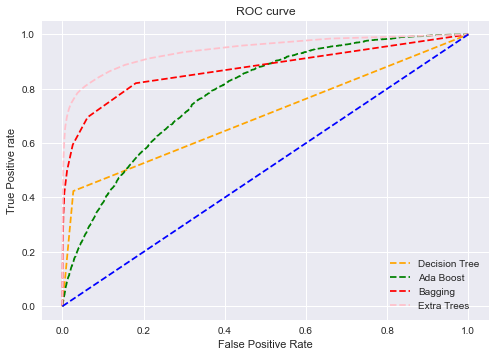

In [13]:
# matplotlib
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr5, tpr5, linestyle='--',color='orange', label='Decision Tree')
plt.plot(fpr6, tpr6, linestyle='--',color='green', label='Ada Boost')
plt.plot(fpr7, tpr7, linestyle='--',color='red', label='Bagging')
plt.plot(fpr8, tpr8, linestyle='--',color='pink', label='Extra Trees')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC2',dpi=300)
plt.show();

In [14]:
# gaussian
model9 = GaussianNB()
# multinomia
model10 = MLPClassifier()

# fit model
model9.fit(X_train, y_train)
model10.fit(X_train, y_train)

# predict probabilities
pred_prob9 = model9.predict_proba(X_test)
pred_prob10 = model10.predict_proba(X_test)

# roc curve for models
fpr9, tpr9, thresh9 = roc_curve(y_test, pred_prob9[:,1], pos_label=1)
fpr10, tpr10, thresh10 = roc_curve(y_test, pred_prob10[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score9 = roc_auc_score(y_test, pred_prob9[:,1])
auc_score10 = roc_auc_score(y_test, pred_prob10[:,1])

print("AUC for Gaussian Model : ", auc_score9)
print("AUC for MLP Model : ", auc_score10)

AUC for Gaussian Model :  0.7012743318717075
AUC for MLP Model :  0.8679161613061022


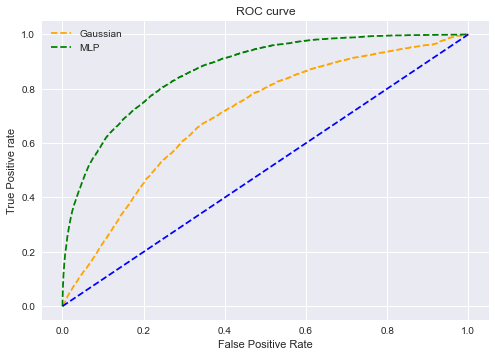

In [15]:
# matplotlib
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr9, tpr9, linestyle='--',color='orange', label='Gaussian')
plt.plot(fpr10, tpr10, linestyle='--',color='green', label='MLP')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC3',dpi=300)
plt.show();

Comments: It is evident from the above plots that the AUC for the Random Forest & Extra Trees ROC curve are higher than other ROC curve. Therefore, we can say that RandomForestClassifier and ExtraTreesClassifier did a better job of classifying the positive class in the dataset.